# Predictive Marketing

### CS-SBU-2023

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
import copy
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings("ignore")

In [59]:
raw_data = pd.read_csv("..\data\ECommerce_consumer behaviour.csv")

In [4]:
data = raw_data.copy()

In [5]:
data.shape

(2019501, 12)

In [6]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [7]:
features = data.columns

Features: <br>
order_id – (A unique number to identity the order) <br>
user_id - (A unique number to identify the user) <br>
order_number – (Number of the order)<br>
order_dow – (Day of the Week the order was made)<br>
order_hour_of_day – (Time of the order)<br>
days_since_prior_order - (History of the order)<br>
product_id – (Id of the product)<br>
add_to_cart_order – (Number of items added to cart)<br>
reordered – (If the reorder took place)<br>
department_id - (Unique number allocated to each department)<br>
department – (Names of the departments)<br>
product_name – (Name of the products)<br>

In [7]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


##### Dealing with the null values

In [8]:
data.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [9]:
average = data["days_since_prior_order"].mean()
data["days_since_prior_order"] = data["days_since_prior_order"].fillna(average)

In [10]:
data["days_since_prior_order"].isnull().sum()

0

In [11]:
data.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

We have to convert the float64 to int64.

#### Plot Functions

In [13]:
def plot_hist(data, x):
    sns.set_style('darkgrid')
    sns.histplot(data= data, x = x,color = 'navy',alpha = 1,binwidth = 1)
    plt.show()
    
def plot_bar_count(data, x, xlabel):
    group = data.groupby(x).size()
    plt.bar(group.index, group.values, color = "navy")
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

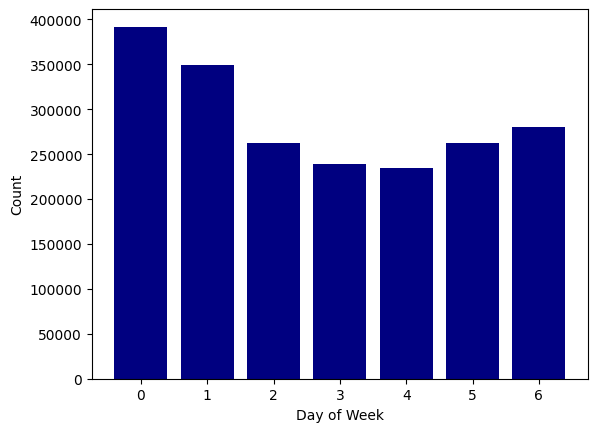

In [98]:
plot_bar_count(data, "order_dow", "Day of Week")

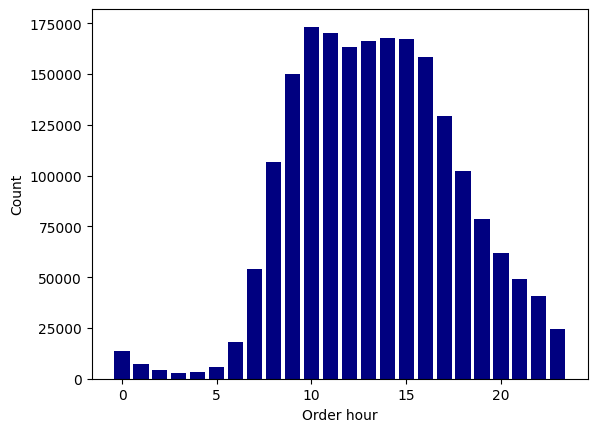

In [16]:
plot_bar_count(data, "order_hour_of_day", "Order hour")

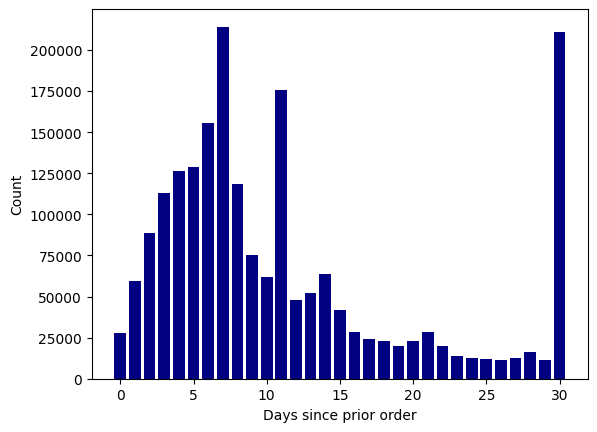

In [17]:
plot_bar_count(data, "days_since_prior_order","Days since prior order")

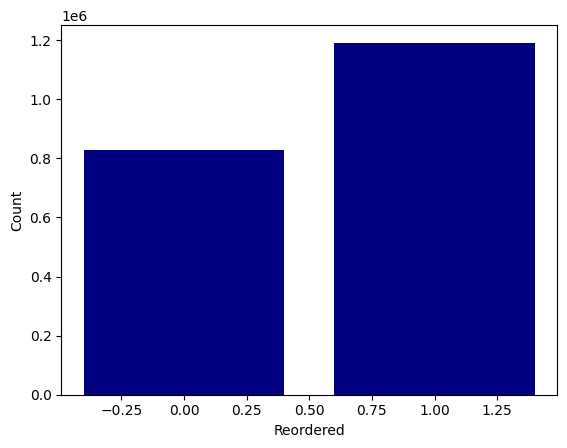

In [18]:
plot_bar_count(data, "reordered","Reordered")

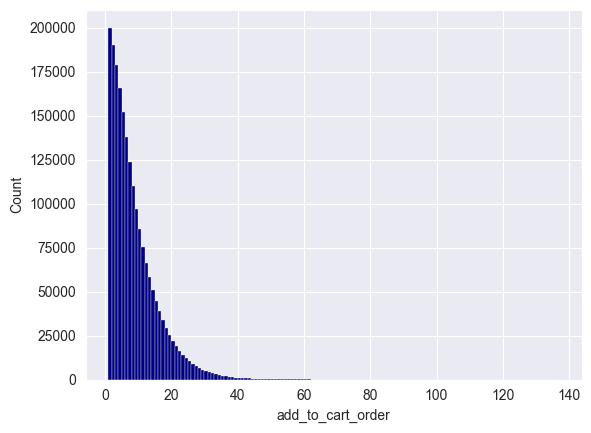

In [19]:
plot_hist(data, "add_to_cart_order")

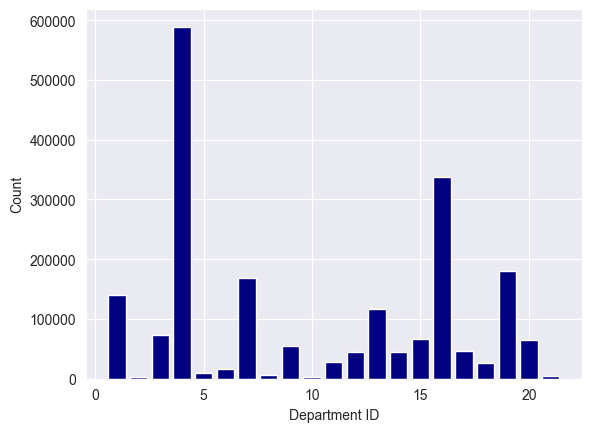

In [20]:
plot_bar_count(data, "department_id", "Department ID")

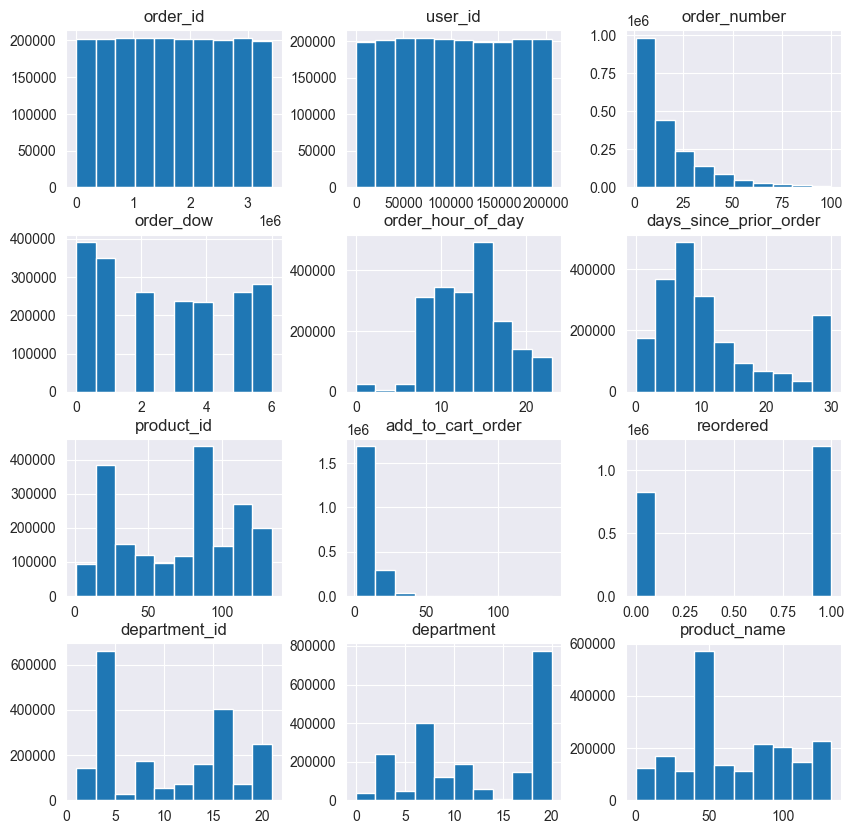

In [64]:
data.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.3)
plt.show()

In [135]:
sns.set(style="ticks")
sns.pairplot(data)
plt.show()


KeyboardInterrupt



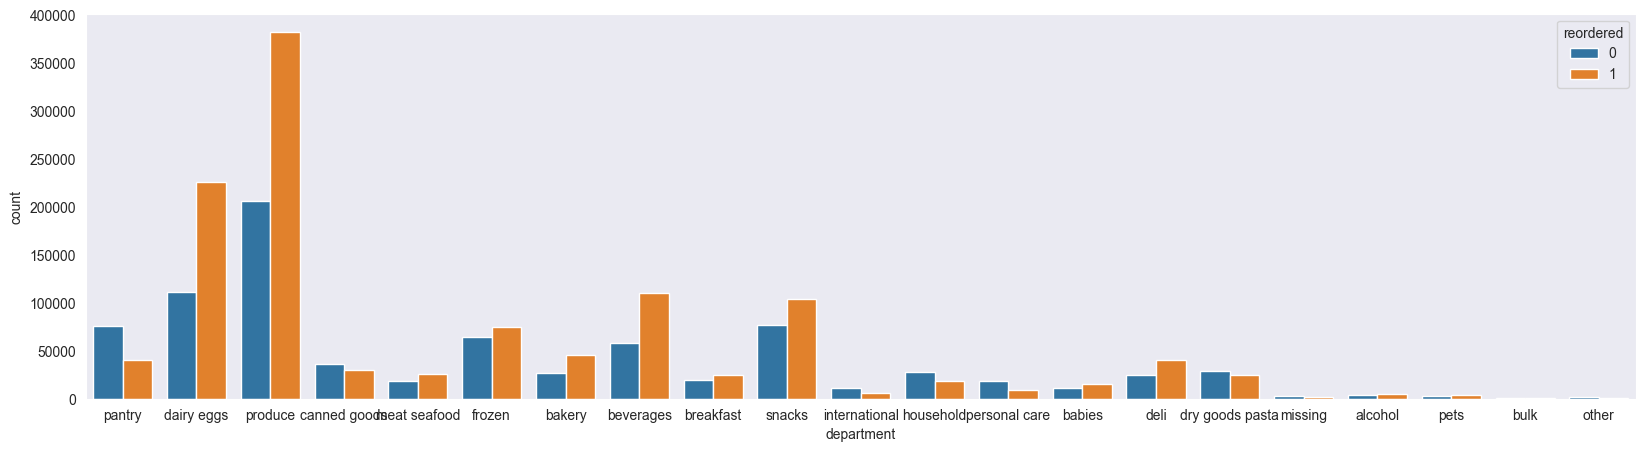

In [71]:
plt.figure(figsize=(20,5))
sns.countplot(x="department" , hue = 'reordered', data= raw_data)
plt.show()

In [76]:
np.sort(data["order_hour_of_day"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [13]:
data2 = data.copy()

In [15]:
conditions = [
    (data['order_hour_of_day'] >= 4) & (data['order_hour_of_day'] <= 11),
    (data['order_hour_of_day'] > 11) & (data['order_hour_of_day'] <= 14),
    (data['order_hour_of_day'] > 14) &(data['order_hour_of_day'] <= 19),
    (data['order_hour_of_day'] > 19) |(data['order_hour_of_day'] < 4)
]
values = ['Morning', 'Noon','Afternoon','Night']

data2['order_time'] = np.select(conditions, values, default='Unknown')

In [16]:
data2['order_time'].unique()

array(['Afternoon', 'Morning', 'Night', 'Noon'], dtype=object)

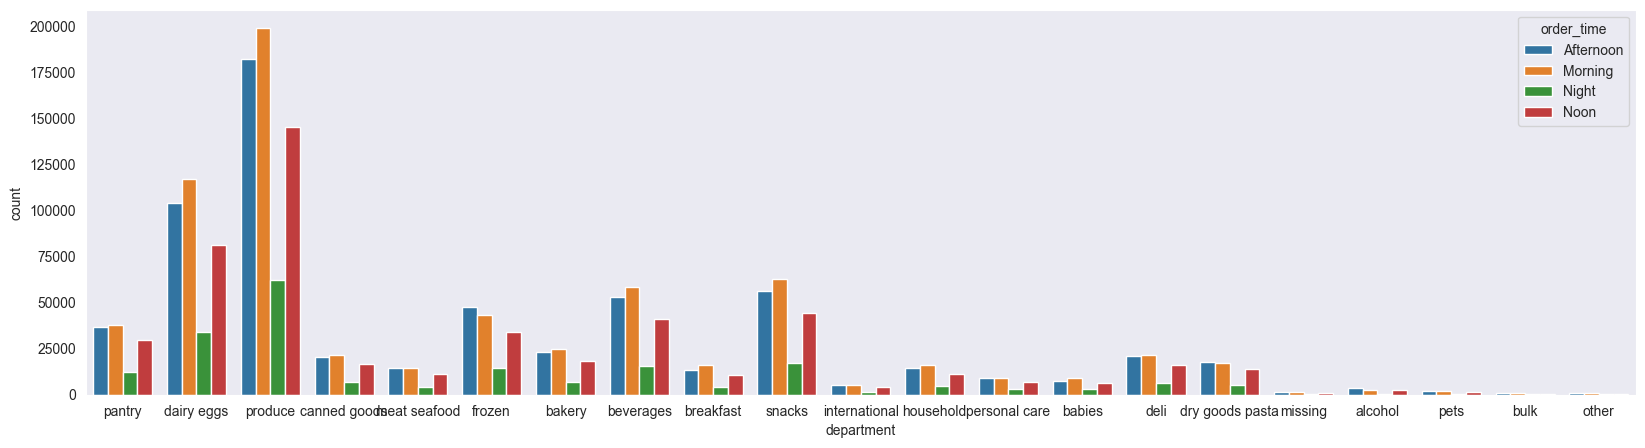

In [96]:
plt.figure(figsize=(20,5))
sns.countplot(x="department" , hue = 'order_time', data= data2)
plt.show()

In [21]:
departments = data["department"].unique()
print("We have",len(departments),"unique departments.")
departments

We have 21 unique departments.


array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [22]:
product_names = data["product_name"].unique()
print("We have",len(product_names),"unique products.")
product_names

We have 134 unique products.


array(['baking ingredients', 'soy lactosefree', 'butter',
       'fresh vegetables', 'yogurt', 'canned meals beans',
       'poultry counter', 'ice cream ice', 'fresh fruits', 'milk',
       'packaged cheese', 'bread', 'tea', 'bakery desserts',
       'frozen breakfast', 'cereal', 'eggs', 'buns rolls', 'cream',
       'water seltzer sparkling water', 'pickled goods olives',
       'packaged poultry', 'other creams cheeses',
       'honeys syrups nectars', 'coffee', 'refrigerated',
       'energy granola bars', 'soft drinks', 'latino foods',
       'plates bowls cups flatware', 'paper goods', 'oral hygiene',
       'diapers wipes', 'food storage', 'nuts seeds dried fruit', 'soap',
       'packaged vegetables fruits', 'hot dogs bacon sausage',
       'lunch meat', 'chips pretzels', 'meat counter',
       'fresh dips tapenades', 'prepared soups salads', 'condiments',
       'juice nectars', 'canned fruit applesauce',
       'preserved dips spreads', 'packaged produce',
       'canned jarr

<AxesSubplot: >

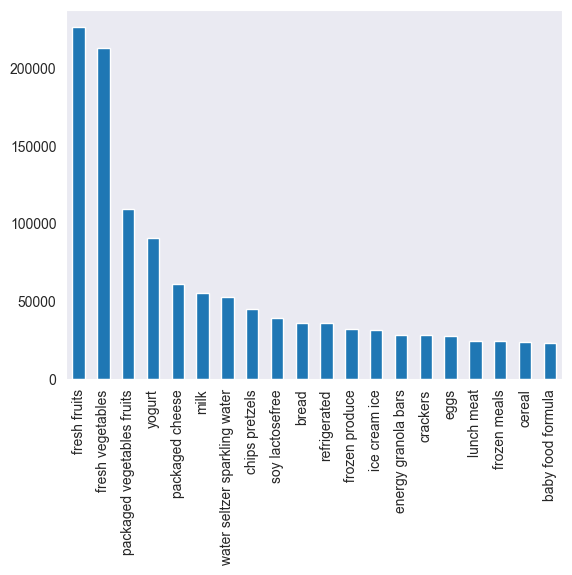

In [113]:
most_selled_products = data['product_name'].value_counts()[:20]
most_selled_products.plot(kind='bar')

#### Removing Unnecessary Features

We see that the product name and department can be removed, since their ID is enough.

In [14]:
data = data.drop(columns=["product_name","department"])

### Encoding Data

In [15]:
encoded_data = pd.get_dummies(data, columns=['reordered'])

In [19]:
encoded_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,department_id,reordered_0,reordered_1
0,2425083,49125,1,2,18,11,17,1,13,1,0
1,2425083,49125,1,2,18,11,91,2,16,1,0
2,2425083,49125,1,2,18,11,36,3,16,1,0
3,2425083,49125,1,2,18,11,83,4,4,1,0
4,2425083,49125,1,2,18,11,83,5,4,1,0


In [16]:
data = encoded_data.copy()

In [21]:
# departments = np.unique(data["department"])

In [22]:
# encoded_data['department'].replace(departments,list(range(0,len(departments))), inplace=True)
# np.unique(encoded_data["department"])

In [23]:
# product_names = np.unique(data["product_name"])

In [24]:
# encoded_data['product_name'].replace(product_names,list(range(0,len(product_names))), inplace=True)
# np.unique(encoded_data["product_name"])

In [25]:
# data = encoded_data.copy()

### Scale Data

In [17]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)

In [28]:
scaled_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,department_id,reordered_0,reordered_1
0,0.728279,-0.906728,-0.921579,-0.351198,1.075339,-0.041683,-1.418733,-1.029806,0.488888,1.198956,-1.198956
1,0.728279,-0.906728,-0.921579,-0.351198,1.075339,-0.041683,0.518072,-0.889947,0.966372,1.198956,-1.198956
2,0.728279,-0.906728,-0.921579,-0.351198,1.075339,-0.041683,-0.921445,-0.750088,0.966372,1.198956,-1.198956
3,0.728279,-0.906728,-0.921579,-0.351198,1.075339,-0.041683,0.308687,-0.610229,-0.943564,1.198956,-1.198956
4,0.728279,-0.906728,-0.921579,-0.351198,1.075339,-0.041683,0.308687,-0.470370,-0.943564,1.198956,-1.198956


### K-Means

In [18]:
class KMeans_model:
    
    def __init__(self, inp_data, n_clusters=5):
        self.n_clusters = n_clusters
        self.data = inp_data
        self.model = KMeans(n_clusters=n_clusters, random_state=0).fit(inp_data)

    def get_silhouette(self,n_samples = 10000):
        samples = self.data.sample(n=n_samples, random_state=42)
        model_copy = copy.deepcopy(self.model)
        samples_labels = model_copy.predict(samples)
        
        silhouette_avg = silhouette_score(samples, samples_labels)
        return silhouette_avg
     
    def plot_tsne(self, n_components=2, n_samples= 1000):
        tsne_samples = self.data.sample(n=n_samples, random_state=42)
        model_copy = copy.deepcopy(self.model)
        tsne_labels = model_copy.predict(tsne_samples)

        tsne = TSNE(n_components=n_components, random_state=42)
        X_tsne = tsne.fit_transform(tsne_samples)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_labels, cmap='viridis')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title('Clustering Results with K-Means (k={})'.format(self.n_clusters))
        plt.colorbar(label='Cluster')
        plt.show()

In [19]:
def elbow_plot(data, max_clusters):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Plot for K-means Clustering')
    plt.show()

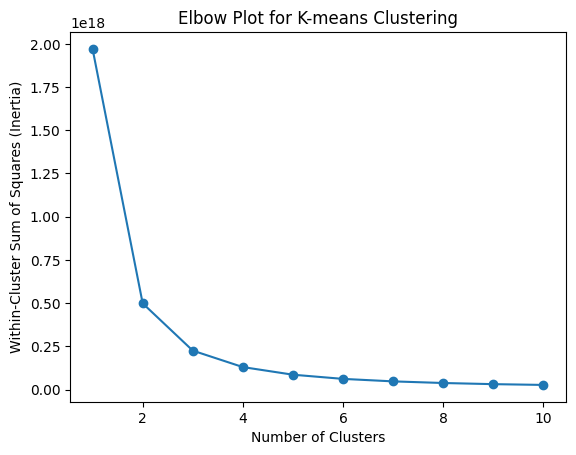

In [137]:
elbow_plot(data, 10)

The silhouette average is 0.54999


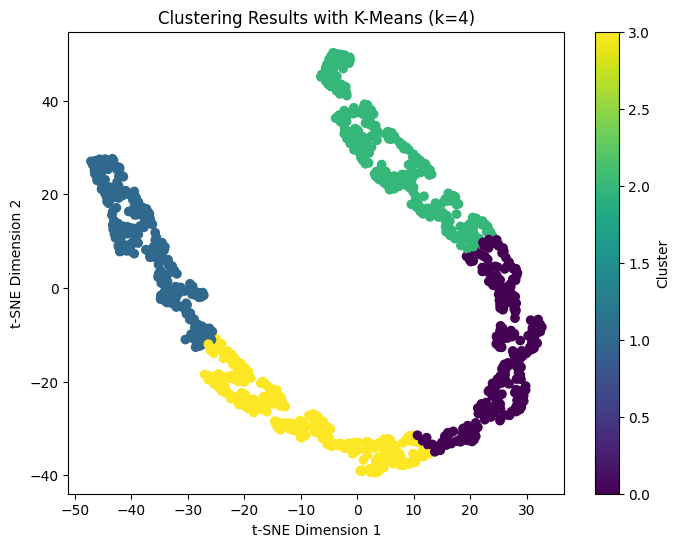

In [103]:
model = KMeans_model(data, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

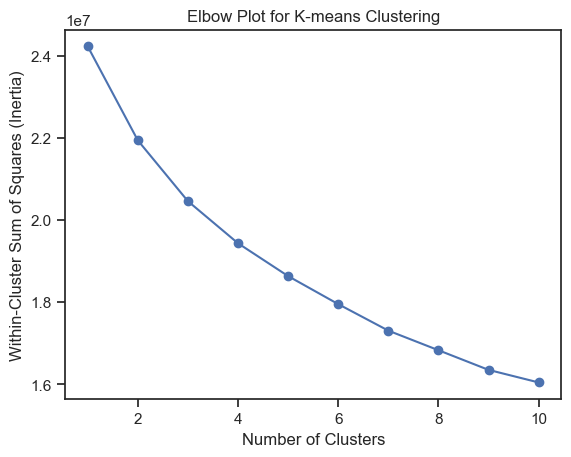

In [138]:
elbow_plot(scaled_data, 10)

n_clusters = 2

The silhouette average is 0.19648


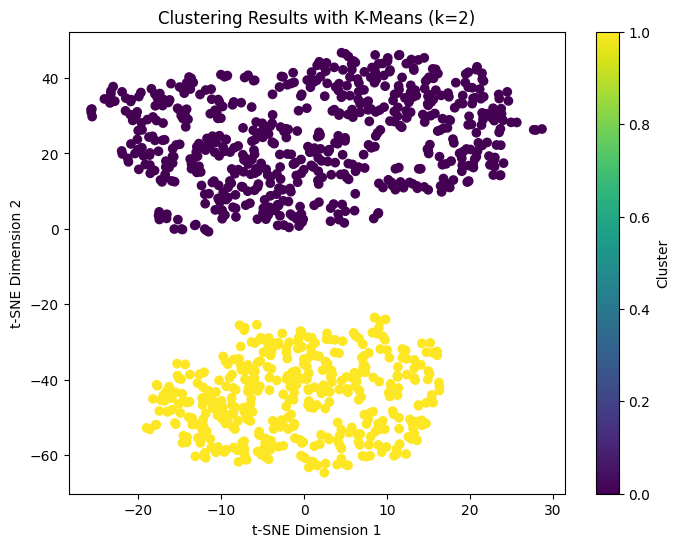

In [133]:
model = KMeans_model(scaled_data, n_clusters = 2)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

n_clusters = 7

In [116]:
model = KMeans_model(scaled_data, n_clusters = 7)
print("The silhouette average is", model.get_silhouette().round(5))

The silhouette average is 0.10223


n_clusters = 5

In [117]:
model = KMeans_model(scaled_data, n_clusters = 5)
print("The silhouette average is", model.get_silhouette().round(5))

The silhouette average is 0.10767


### Treating Outliers

In [20]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'department_id', 'reordered_0', 'reordered_1'],
      dtype='object')

In [21]:
def plot_boxplots(dataset):
    fig, axs = plt.subplots(nrows=1, ncols=dataset.shape[1], figsize=(20, 5))
    
    for i, col in enumerate(dataset.columns):
        axs[i].boxplot(dataset[col])
        axs[i].set_title(col)
        
    fig.tight_layout()
    plt.show()

In [22]:
def remove_outliers(data, features):
    data2 = data.copy()
    for feature in features:
        upper,lower = get_IQR(data2,feature)
        data2 = data2[(data2[feature]<=upper) & (data2[feature]>=lower)]
    print(f"{abs(data.shape[0] - data2.shape[0])} samples were dropped.")
    return data2

In [23]:
def get_IQR(data, feature):
    Q1 = np.percentile(data[feature], 25, method = 'midpoint')
    Q3 = np.percentile(data[feature], 75, method = 'midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    return upper, lower

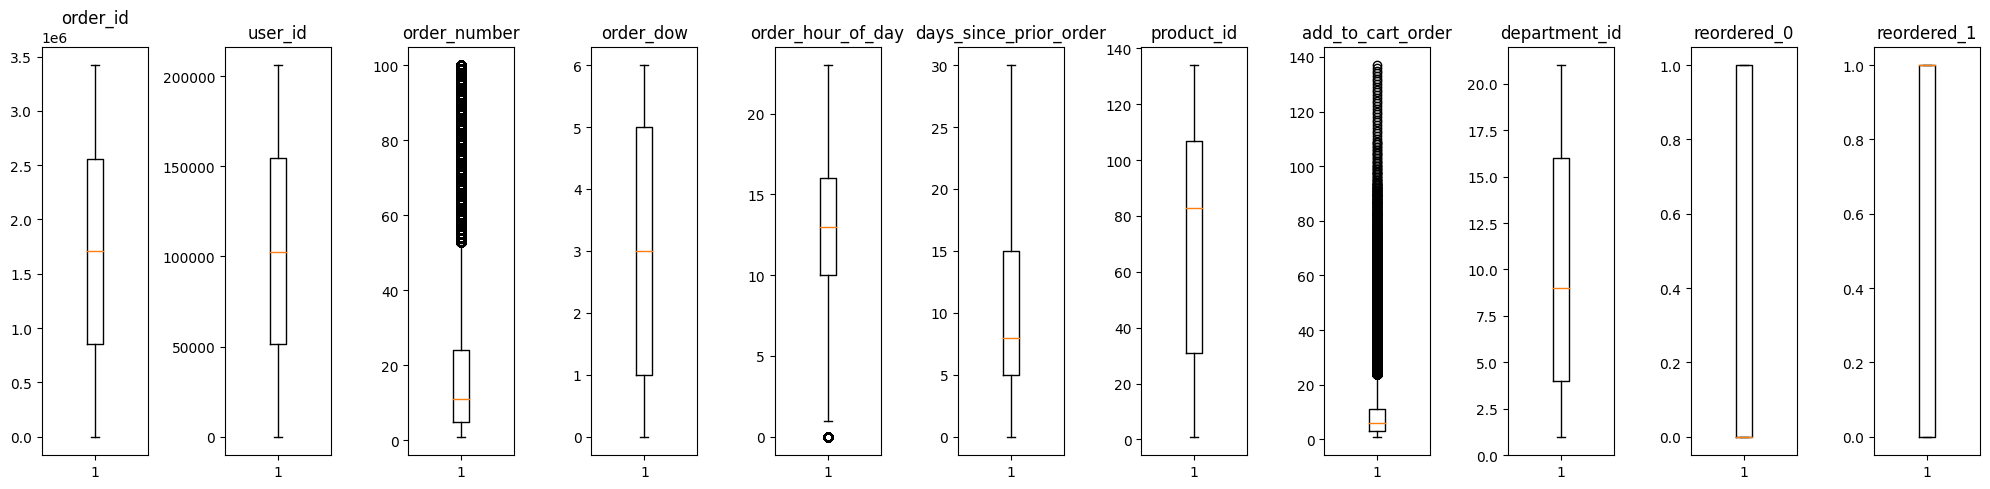

In [49]:
plot_boxplots(data)

In [24]:
data2 = remove_outliers(data, ["add_to_cart_order","order_number"])

190558 samples were dropped.


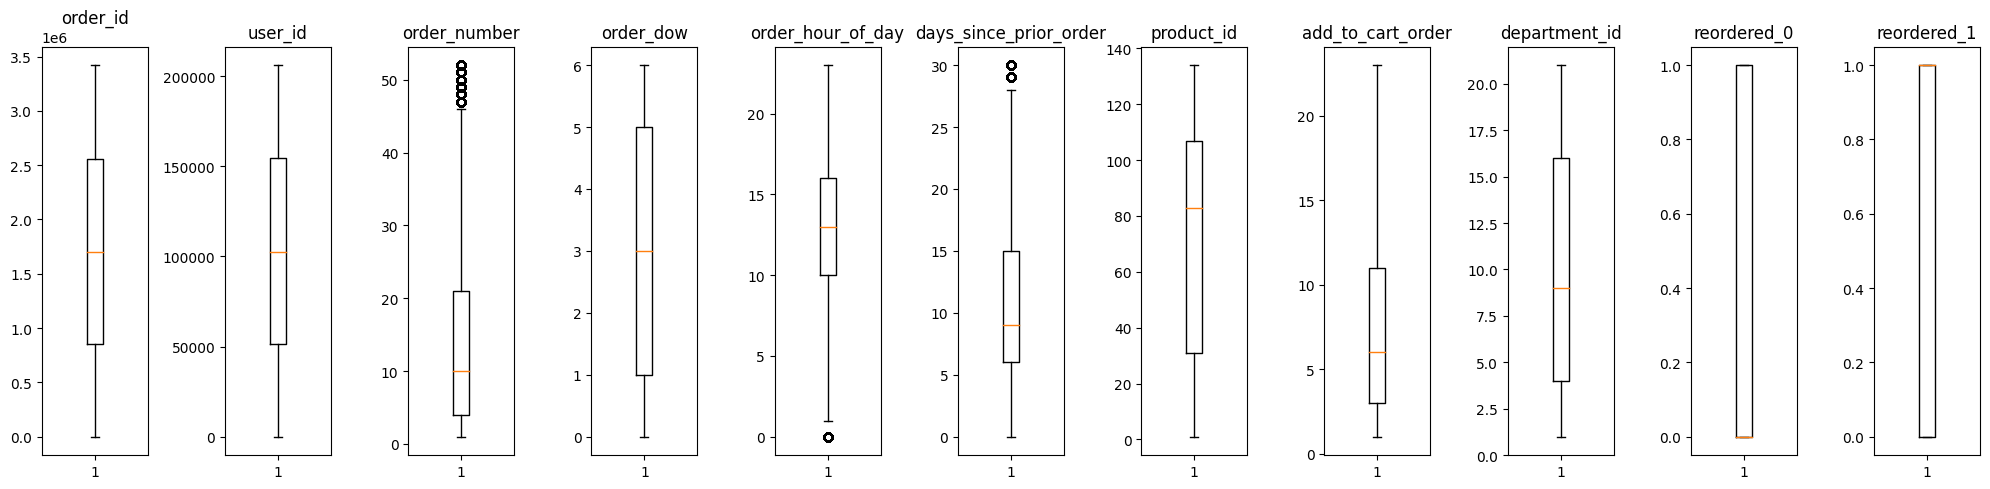

In [51]:
plot_boxplots(data2)

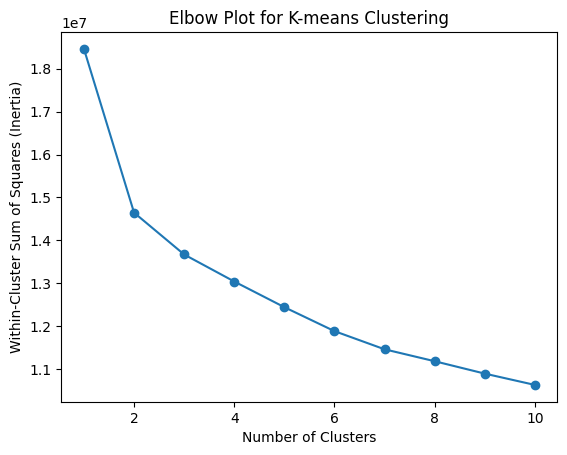

In [54]:
elbow_plot(data2, 10)

The silhouette average is 0.53261


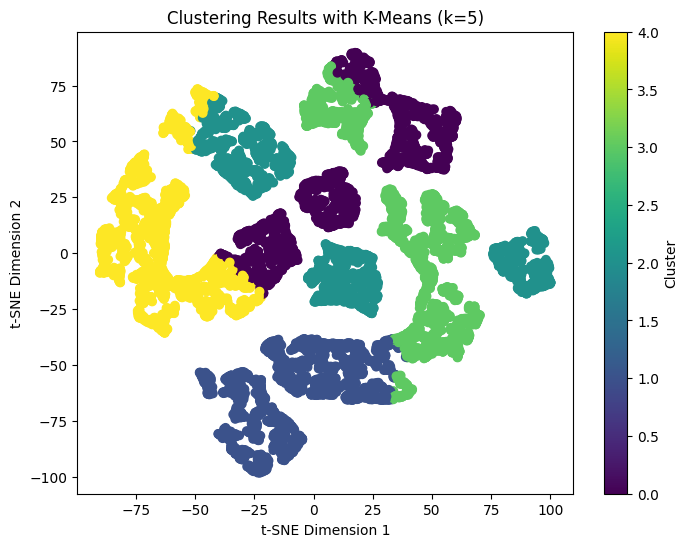

In [93]:
model = KMeans_model(data2, n_clusters = 5)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne(n_samples = 10000)

In [25]:
data2_scaled = remove_outliers(scaled_data, ["add_to_cart_order","order_number"])

190558 samples were dropped.


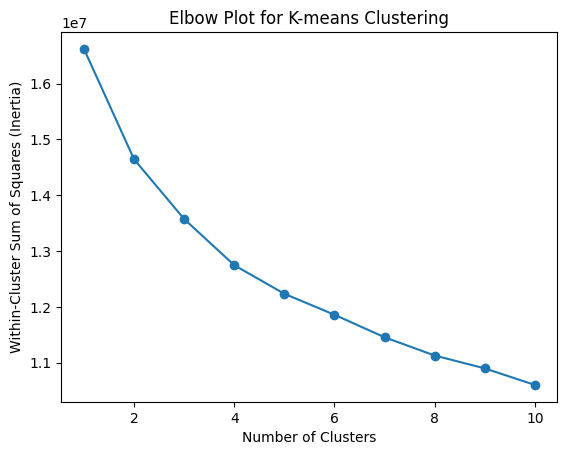

In [168]:
elbow_plot(data2_scaled, 10)

The silhouette average is 0.13357


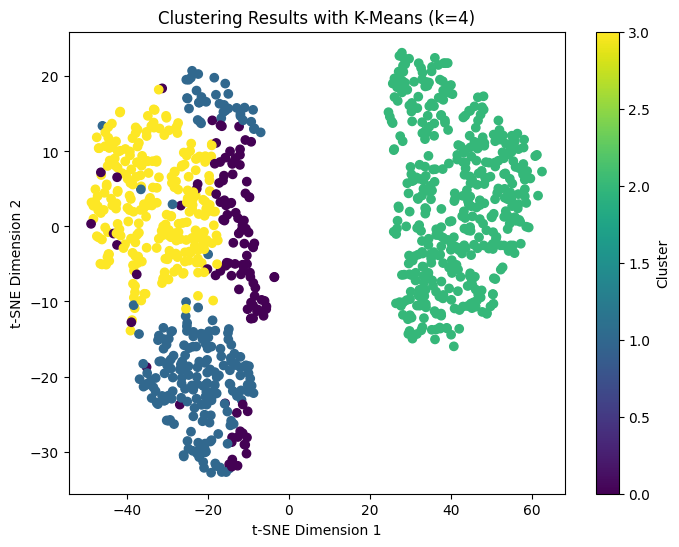

In [101]:
model = KMeans_model(data2_scaled, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

The silhouette average is 0.13357


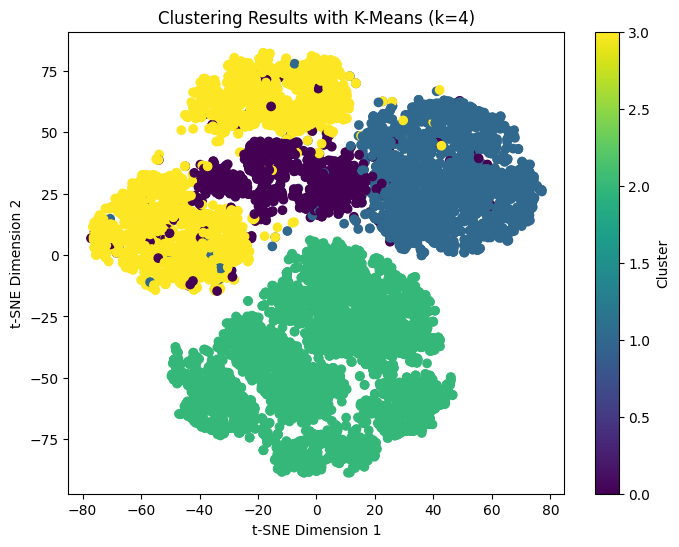

In [105]:
model = KMeans_model(data2_scaled, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne(n_samples=10000)

### DBSCAN

In [46]:
class DBSCAN_model:
    
    def __init__(self, inp_data, eps=0.5, min_samples=5):
        self.data = inp_data
        self.model = DBSCAN(eps=eps, min_samples=min_samples)
        self.model.fit(inp_data)
        self.total_labels = self.model.labels_
        
    def get_silhouette(self,n_samples = 10000):
        samples = self.data.sample(n=n_samples, random_state=42)
        sample_labels = self.total_labels[samples.index]
        
        silhouette_avg = silhouette_score(samples, sample_labels)
        return silhouette_avg
     
    def plot_tsne(self, n_components=2, n_samples= 1000):
        tsne_samples = self.data.sample(n=n_samples, random_state=42)
        tsne_labels = self.total_labels[tsne_samples.index]

        tsne = TSNE(n_components=n_components, random_state=42)
        X_tsne = tsne.fit_transform(tsne_samples)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_labels, cmap='viridis')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title('Clustering Results with DBSCAN')
        plt.colorbar(label='Cluster')
        plt.show()

In [47]:
samples = data2_scaled.sample(n=100000, random_state=42)
samples.reset_index(drop=True, inplace=True)
model = DBSCAN_model(samples, min_samples=5)

The silhouette average is -0.23936


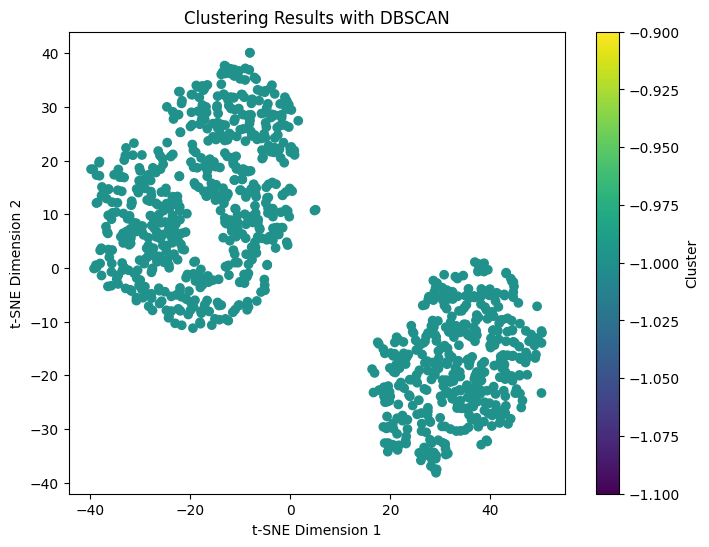

In [48]:
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

In [50]:
samples = scaled_data.sample(n=100000, random_state=42)
samples.reset_index(drop=True, inplace=True)
model = DBSCAN_model(samples, min_samples=5)

The silhouette average is -0.25264


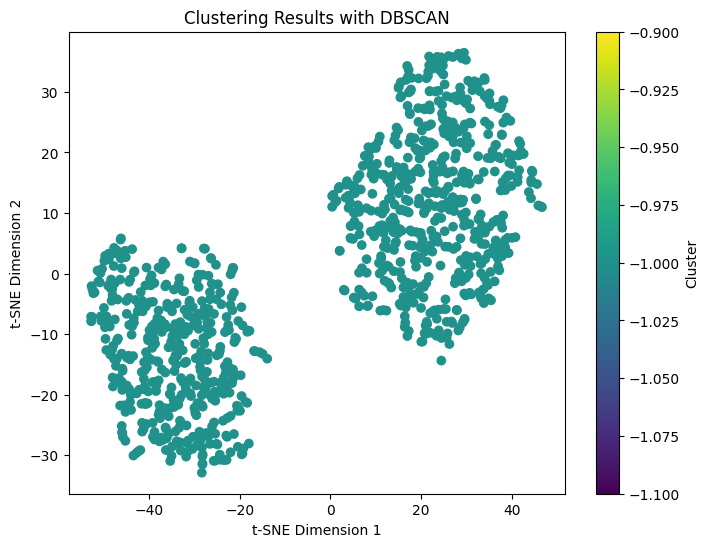

In [51]:
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

### Hierarchical Clustering

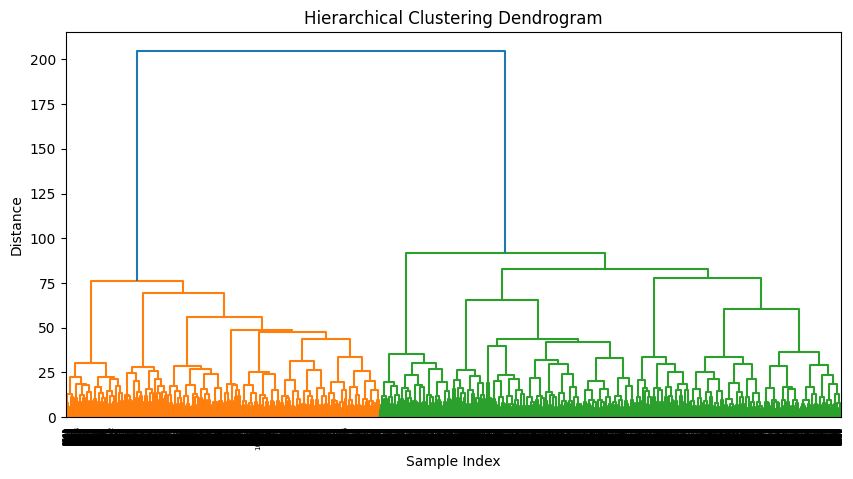

In [56]:
samples = scaled_data.sample(n=10000, random_state=42)
samples.reset_index(drop=True, inplace=True)
Z = linkage(samples, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=np.arange(1, samples.shape[0] + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [97]:
class Agglomerative_model:
    
    def __init__(self, inp_data, n_clusters=4):
        self.data = inp_data
        self.model = AgglomerativeClustering(n_clusters=3)
        self.total_labels = self.model.fit_predict(inp_data)
        
    def get_silhouette(self,n_samples = 10000):
        samples = self.data.sample(n=n_samples, random_state=42)
        sample_labels = self.total_labels[samples.index]
        
        silhouette_avg = silhouette_score(samples, sample_labels)
        return silhouette_avg
     
    def plot_tsne(self, n_components=2, n_samples= 1000):
        tsne_samples = self.data.sample(n=n_samples, random_state=42)
        tsne_labels = self.total_labels[tsne_samples.index]

        tsne = TSNE(n_components=n_components, random_state=42)
        X_tsne = tsne.fit_transform(tsne_samples)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_labels, cmap='viridis')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title('Clustering Results with Agglomerative Clustering')
        plt.colorbar(label='Cluster')
        plt.show()

The silhouette average is 0.12871


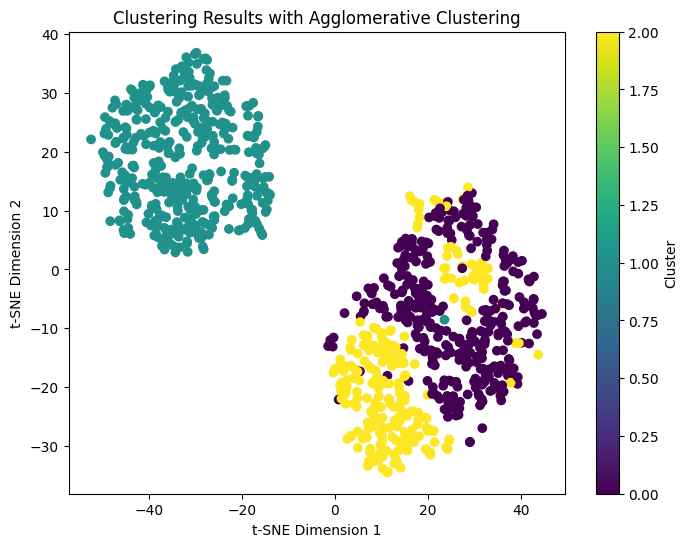

In [100]:
samples = data2_scaled.sample(n=20000, random_state=42)
samples.reset_index(drop=True, inplace=True)
model = Agglomerative_model(samples, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

### Feature Selection

n_components = 2

In [60]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(data2_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

print("Selected Features:", pca.components_)

Explained Variance Ratio: [0.21081795 0.10531483]
Selected Features: [[-3.46786491e-03  2.86151348e-03 -2.15646607e-01  7.82855218e-03
   2.64636710e-02  1.73400817e-01 -1.35201051e-04  8.98992852e-02
   4.46336580e-02  6.75489751e-01 -6.75489751e-01]
 [-1.56535183e-02 -2.67154621e-02 -7.37366297e-02 -1.16734449e-01
   9.23254185e-02  2.01882504e-01 -6.64523866e-01 -2.53482085e-02
  -6.98616329e-01 -1.40965475e-02  1.40965475e-02]]


In [67]:
df_2 = pd.DataFrame(X_pca)

In [68]:
df_2

,0,1
0,1.709001,0.778066
1,1.742624,-0.846110
2,1.755392,0.106938
3,1.682551,0.620253
4,1.695125,0.616708
...,...,...
1828938,1.436136,0.265010
1828939,-1.727644,-0.543048
1828940,-1.736089,1.230571
1828941,-1.723516,1.227026


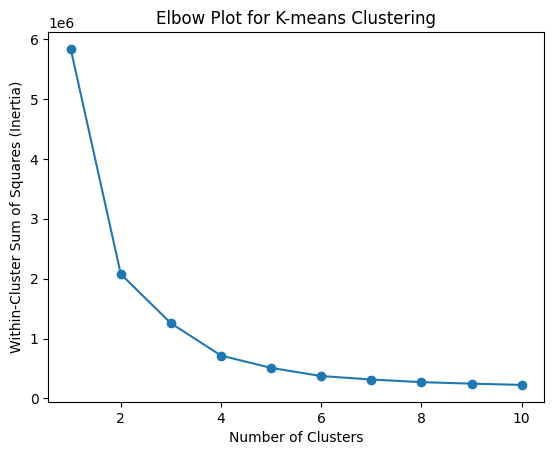

In [69]:
elbow_plot(df_2, 10)

The silhouette average is 0.52425


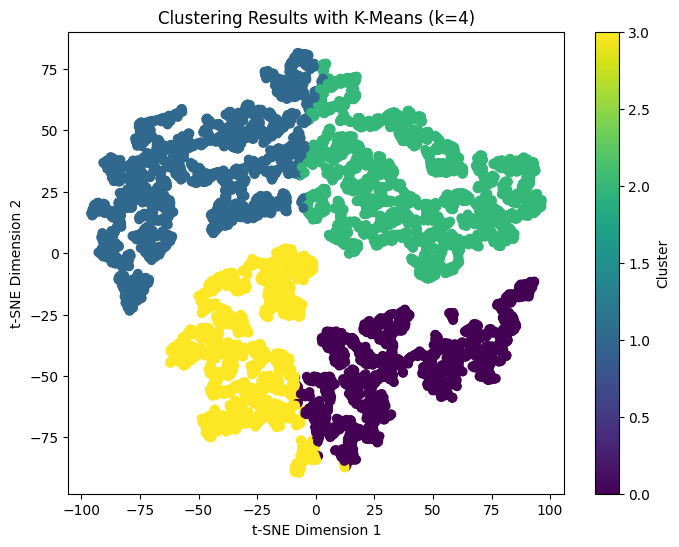

In [64]:
model = KMeans_model(df_2, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne(n_samples=10000)

n_components = 3

In [71]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(data2_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

print("Selected Features:", pca.components_)

Explained Variance Ratio: [0.21081795 0.10531483 0.10428653]
Selected Features: [[-3.46786491e-03  2.86151348e-03 -2.15646607e-01  7.82855218e-03
   2.64636710e-02  1.73400817e-01 -1.35201051e-04  8.98992852e-02
   4.46336580e-02  6.75489751e-01 -6.75489751e-01]
 [-1.56535183e-02 -2.67154621e-02 -7.37366297e-02 -1.16734449e-01
   9.23254185e-02  2.01882504e-01 -6.64523866e-01 -2.53482085e-02
  -6.98616329e-01 -1.40965475e-02  1.40965475e-02]
 [-3.48661569e-02  3.52123273e-02 -1.98759513e-01 -5.26269427e-01
  -9.40071732e-02  7.56788836e-01  2.42112829e-01  1.44023123e-02
   8.89644061e-02 -1.28008172e-01  1.28008172e-01]]


In [72]:
df_3 = pd.DataFrame(X_pca)

In [73]:
df_3

,0,1,2
0,1.709001,0.778066,-0.503214
1,1.742624,-0.846110,0.010204
2,1.755392,0.106938,-0.336307
3,1.682551,0.620253,-0.206378
4,1.695125,0.616708,-0.204364
...,...,...,...
1828938,1.436136,0.265010,-1.087425
1828939,-1.727644,-0.543048,-0.513750
1828940,-1.736089,1.230571,-1.080171
1828941,-1.723516,1.227026,-1.078157


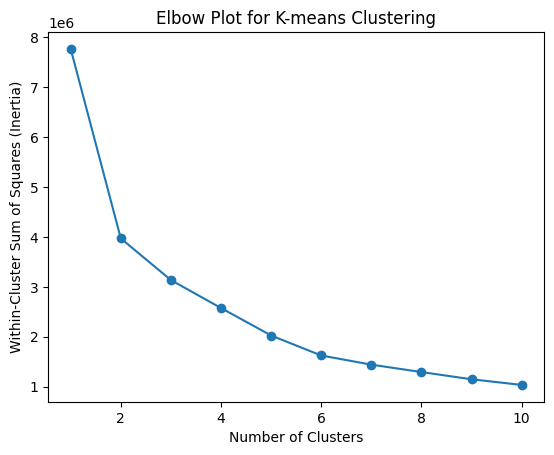

In [81]:
elbow_plot(df_3, 10)

The silhouette average is 0.32628


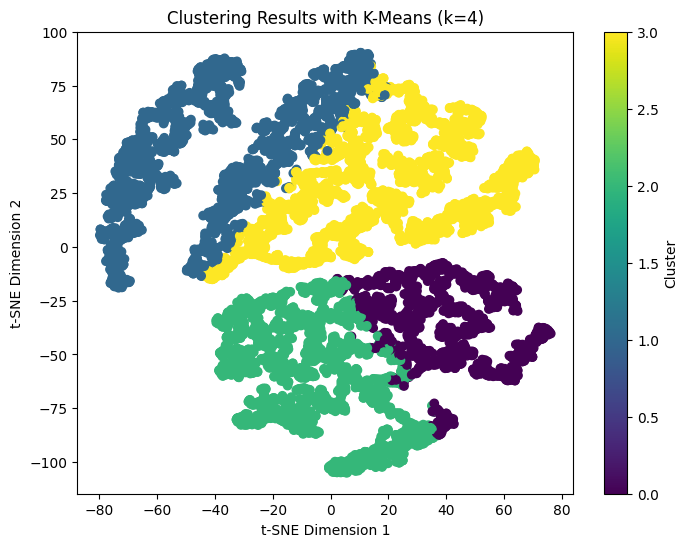

In [75]:
model = KMeans_model(df_3, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne(n_samples=10000)

n_components = 4

In [76]:
pca = PCA(n_components=4)  
X_pca = pca.fit_transform(data2_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

print("Selected Features:", pca.components_)

Explained Variance Ratio: [0.21081795 0.10531483 0.10428653 0.09955635]
Selected Features: [[-3.46786491e-03  2.86151348e-03 -2.15646607e-01  7.82855218e-03
   2.64636710e-02  1.73400817e-01 -1.35201051e-04  8.98992852e-02
   4.46336580e-02  6.75489751e-01 -6.75489751e-01]
 [-1.56535183e-02 -2.67154621e-02 -7.37366297e-02 -1.16734449e-01
   9.23254185e-02  2.01882504e-01 -6.64523866e-01 -2.53482085e-02
  -6.98616329e-01 -1.40965475e-02  1.40965475e-02]
 [-3.48661569e-02  3.52123273e-02 -1.98759513e-01 -5.26269427e-01
  -9.40071732e-02  7.56788836e-01  2.42112829e-01  1.44023123e-02
   8.89644061e-02 -1.28008172e-01  1.28008172e-01]
 [-3.99099609e-01  4.09432467e-01  7.95770953e-02 -2.97843382e-01
  -6.99139984e-01 -2.45896683e-01 -1.47657475e-01  2.62403443e-02
   8.45137389e-03  5.57528235e-02 -5.57528235e-02]]


In [77]:
df_4 = pd.DataFrame(X_pca)

In [78]:
df_4

,0,1,2,3
0,1.709001,0.778066,-0.503214,-1.021983
1,1.742624,-0.846110,0.010204,-1.300261
2,1.755392,0.106938,-0.336307,-1.084036
3,1.682551,0.620253,-0.206378,-1.278146
4,1.695125,0.616708,-0.204364,-1.274476
...,...,...,...,...
1828938,1.436136,0.265010,-1.087425,-0.524278
1828939,-1.727644,-0.543048,-0.513750,-0.043461
1828940,-1.736089,1.230571,-1.080171,0.276939
1828941,-1.723516,1.227026,-1.078157,0.280609


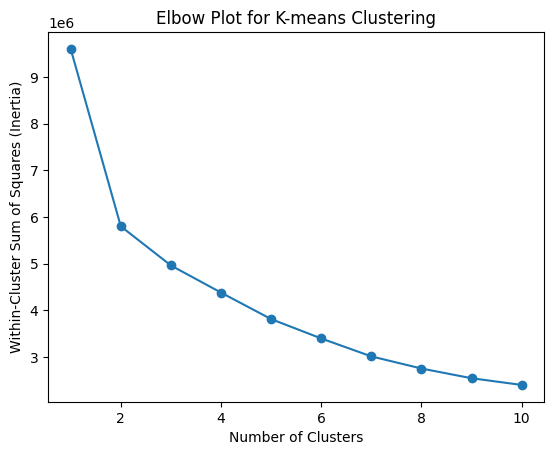

In [79]:
elbow_plot(df_4, 10)

The silhouette average is 0.28853


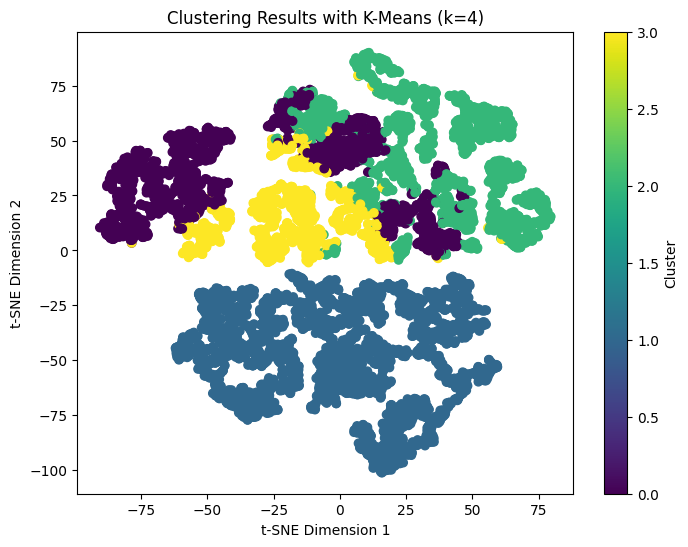

In [80]:
model = KMeans_model(df_4, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne(n_samples=10000)

The silhouette average is 0.54789


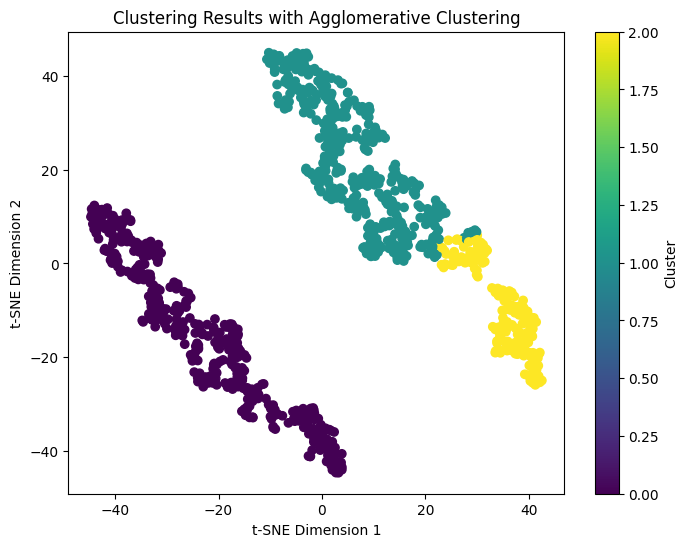

In [101]:
samples = df_2.sample(n=20000, random_state=42)
samples.reset_index(drop=True, inplace=True)
model = Agglomerative_model(samples, n_clusters = 4)
print("The silhouette average is", model.get_silhouette().round(5))
model.plot_tsne()

### Getting an Insight of the clusters

Here I took each of the centroids of the 4 clusters and compared them, so I could see what the data was clustered based on.

In [108]:
pca_1 = PCA(n_components=2)  
X_pca = pca_1.fit_transform(data2_scaled)

explained_variance_ratio = pca_1.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

print("Selected Features:", pca_1.components_)

Explained Variance Ratio: [0.21081795 0.10531483]
Selected Features: [[-3.46786491e-03  2.86151348e-03 -2.15646607e-01  7.82855218e-03
   2.64636710e-02  1.73400817e-01 -1.35201051e-04  8.98992852e-02
   4.46336580e-02  6.75489751e-01 -6.75489751e-01]
 [-1.56535183e-02 -2.67154621e-02 -7.37366297e-02 -1.16734449e-01
   9.23254185e-02  2.01882504e-01 -6.64523866e-01 -2.53482085e-02
  -6.98616329e-01 -1.40965475e-02  1.40965475e-02]]


In [109]:
df_2 = pd.DataFrame(X_pca)

In [106]:
model1 = KMeans_model(df_2, n_clusters = 4)

In [110]:
centroids1 = model1.model.cluster_centers_

In [111]:
centroids_original1 = pca_1.inverse_transform(centroids1)

In [120]:
attributes_scaled_values_1 = []
for centroid in centroids_original1:
    attributes_scaled_values_1.append(centroid)

In [121]:
attributes_scaled_values_1

[array([-0.01861352, -0.01659014, -0.59811549, -0.08321017,  0.12710614,
         0.49953255, -0.53709402,  0.00178728, -0.49161538,  1.15464546,
        -1.15464546]),
 array([-0.01018183, -0.02772597,  0.02105524, -0.11827732,  0.05990278,
         0.01669258, -0.60676196, -0.26224747, -0.69503326, -0.81067778,
         0.81067778]),
 array([ 0.01737052,  0.01911063,  0.15507083,  0.08647659, -0.10273021,
        -0.3413787 ,  0.55977093, -0.21965775,  0.53039692, -0.80026459,
         0.80026459]),
 array([ 0.00778454,  0.02826738, -0.46933098,  0.11290087, -0.02872499,
         0.15621493,  0.58028463,  0.04240898,  0.68209243,  1.16331688,
        -1.16331688])]

In [117]:
features_data2 = data2_scaled.columns
features_data2

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'department_id', 'reordered_0', 'reordered_1'],
      dtype='object')

In [124]:
centroids_df1_scaled = pd.DataFrame(attributes_scaled_values_1, columns= features_data2)

In [125]:
centroids_df1_scaled

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,department_id,reordered_0,reordered_1
0,-0.018614,-0.016590,-0.598115,-0.083210,0.127106,0.499533,-0.537094,0.001787,-0.491615,1.154645,-1.154645
1,-0.010182,-0.027726,0.021055,-0.118277,0.059903,0.016693,-0.606762,-0.262247,-0.695033,-0.810678,0.810678
2,0.017371,0.019111,0.155071,0.086477,-0.102730,-0.341379,0.559771,-0.219658,0.530397,-0.800265,0.800265
3,0.007785,0.028267,-0.469331,0.112901,-0.028725,0.156215,0.580285,0.042409,0.682092,1.163317,-1.163317


In [128]:
centroids_arr1 = scaler.inverse_transform(centroids_df1_scaled)

In [129]:
centroids_arr1

array([[1.68866015e+06, 1.02080299e+05, 6.66894861e+00, 2.56113505e+00,
        1.39785379e+01, 1.57036591e+01, 5.06850105e+01, 8.37595256e+00,
        6.83956272e+00, 9.78204659e-01, 2.17953412e-02],
       [1.69697365e+06, 1.01417816e+05, 1.75203866e+01, 2.48770860e+00,
        1.36935280e+01, 1.15073399e+01, 4.80231890e+01, 6.48808882e+00,
        5.56150208e+00, 1.15008433e-02, 9.88499157e-01],
       [1.72413980e+06, 1.04204179e+05, 1.98691117e+01, 2.91643905e+00,
        1.30038003e+01, 8.39537434e+00, 9.25932207e+01, 6.79260782e+00,
        1.32607963e+01, 1.66228863e-02, 9.83377114e-01],
       [1.71468818e+06, 1.04748925e+05, 8.92599505e+00, 2.97176835e+00,
        1.33176570e+01, 1.27199163e+01, 9.33769931e+01, 8.66640006e+00,
        1.42138889e+01, 9.82469960e-01, 1.75300396e-02]])

In [132]:
centroids_df1 = pd.DataFrame(centroids_arr1, columns = features_data2)
centroids_df1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,department_id,reordered_0,reordered_1
0,1.688660e+06,102080.299451,6.668949,2.561135,13.978538,15.703659,50.685010,8.375953,6.839563,0.978205,0.021795
1,1.696974e+06,101417.815582,17.520387,2.487709,13.693528,11.507340,48.023189,6.488089,5.561502,0.011501,0.988499
2,1.724140e+06,104204.179111,19.869112,2.916439,13.003800,8.395374,92.593221,6.792608,13.260796,0.016623,0.983377
3,1.714688e+06,104748.924885,8.925995,2.971768,13.317657,12.719916,93.376993,8.666400,14.213889,0.982470,0.017530
